## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 5**. Going through these materials before attempting this assignment is highly recommended.

In [2]:
!pip install emnist

You are going to work with the **EMNIST** dataset for *image recognition task*. This dataset can be installed with the command <kbd>pip install emnist</kbd>. It has the exact same format as MNIST (grayscale images of 28 × 28 pixels), but the images represent handwritten letters rather than handwritten digits, so the problem is more challenging than MNIST.

### <span style="color:#0b486b">Question 2.1: Load the EMNIST datasets and process data</span>


<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

We first use functions in the package **emnist**, namely <kbd>extract_training_samples</kbd> and <kbd>extract_test_samples</kbd>, to load the training and testing sets. We also want to encode labels using an ordinal encoding scheme.

In [3]:
import numpy as np
from emnist import extract_training_samples, extract_test_samples
from sklearn.preprocessing import LabelEncoder

In [23]:
#get X_train_raw,y_train_raw,X_test_raw,y_test_raw from emnist
X_train_raw, y_train_raw = extract_training_samples('letters')
X_test_raw, y_test_raw = extract_test_samples('letters')
print(X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape)

(124800, 28, 28) (124800,) (20800, 28, 28) (20800,)


In [5]:
#print(y_train_raw)

[23  7 16 ... 13 15 19]


In [24]:
le = LabelEncoder()
y_train_full = le.fit_transform(y_train_raw)
#print(y_train_full)
y_test = le.transform(y_test_raw)
#print(y_test)

class_ids = np.unique(y_train_full)#get the unique class id from y_train_full
n_classes = len(class_ids)
#print(class_ids)
#print(n_classes)

The shape of training and testing data are $(num\_train, 28, 28)$ and $(num\_test, 28, 28)$, where $num\_train$ and $num\_test$ are number of training and testing images respectively. We next convert them to arrays of vectors which have shape $(num\_train, 784)$ and $(num\_test, 784)$.

In [25]:
num_train = X_train_raw.shape[0]#get the number of training set
num_test = X_test_raw.shape[0]#get the number of test set
X_train_full = X_train_raw.reshape(num_train,-1)#flattern the image
X_test = X_test_raw.reshape(num_test,-1)
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(124800, 784) (124800,)
(20800, 784) (20800,)


In [26]:
print(num_train)
print(num_test)

124800
20800


### <span style="color:#0b486b">Question 2.2: Split data into training, validation, and testing datasets</span>

<div style="text-align: right"> <span style="color:red">[2 points]</span> </div>

You need to write the code to address the following requirements:
- Use $10 \%$ of `X_train_full`, `y_train_full` for validation and the rest of `X_train_full`, `y_train_full` for training. This splits `X_train_full` and `y_train_full` into `X_train`, `y_train` ($90 \%$) and `X_val`, `y_val` ($10 \%$).
- Finally, scale the pixels of `X_train`, `X_val`, and `X_test` to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1,random_state=42) #split the dataset
X_train, X_val, X_test = X_train/255.0, X_val/255.0, X_test/255.0#scale the pixels

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

print(X_train.min(), X_train.max(), X_val.min(), X_val.max(), X_test.min(), X_test.max())

(112320, 784) (112320,)
(12480, 784) (12480,)
(20800, 784) (20800,)
0.0 1.0 0.0 1.0 0.0 1.0


### <span style="color:#0b486b">Question 2.3: Visualize some images in the training set with labels</span>

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to **randomly** show $36$ images in X_train_full_img (which is an array of images) with labels as in the following figure.

<img src="Figures/emnist_grid.png" width="450" align="center"/>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def display_random_images_reshaped(X, y, n=36):
    # Randomly select n indices
    indices = np.random.choice(X.shape[0], n, replace=False)


    # Extract the images and labels
    images = X[indices]
    labels = y[indices]

    labels = [chr( 65+ int(label)) for label in labels]# convert the numbers to its coresponding letters

    # Plot
    fig, axes = plt.subplots(6, 6, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshaping the image here
        ax.set_title(labels[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

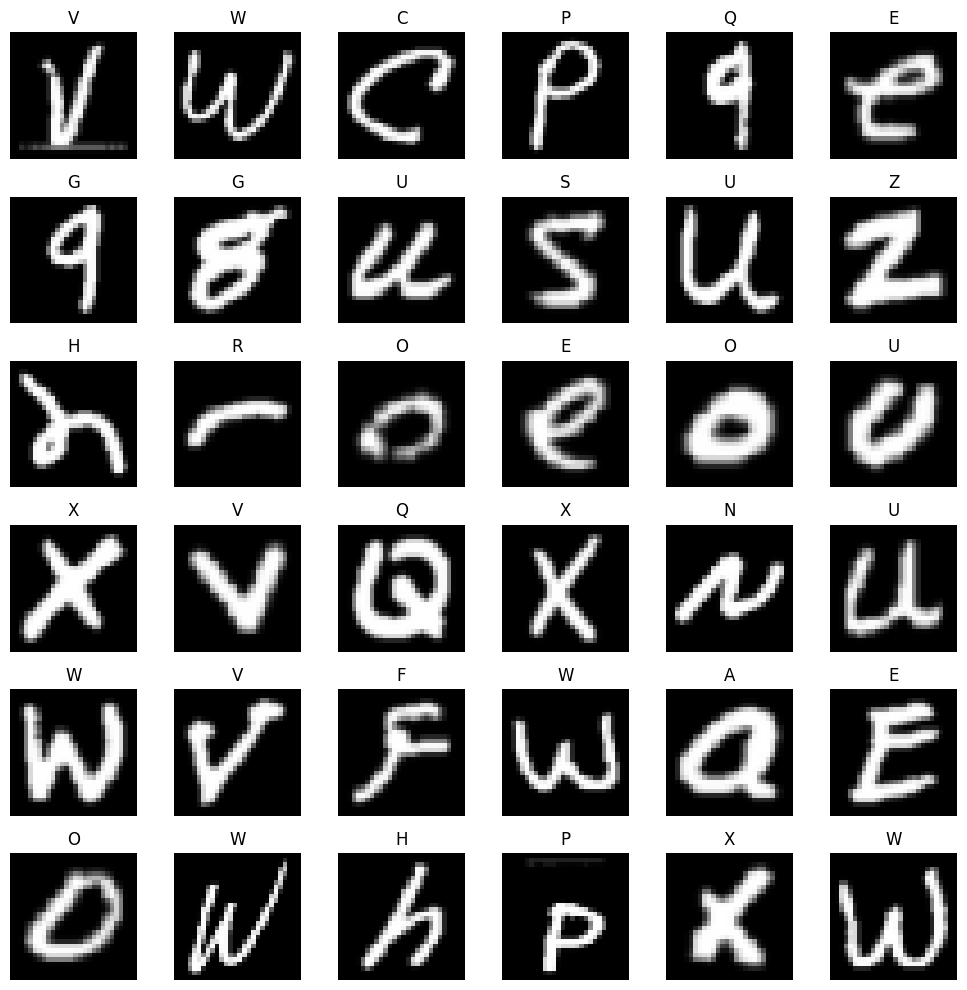

In [29]:
display_random_images_reshaped(X_train_full,y_train_full)

### <span style="color:#0b486b">Question 2.4: Write code for the feed-forward neural net using TF 2.x</span>

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 40(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [30]:
import tensorflow as tf
random_seed = 3181
tf.random.set_seed(random_seed)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [32]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary
model = Sequential()#build the model
model.add(Dense(units=20, input_shape=(784,),activation='relu'))
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=26,activation='softmax'))


In [33]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 40)                840       
                                                                 
 dense_2 (Dense)             (None, 26)                1066      
                                                                 
Total params: 17606 (68.77 KB)
Trainable params: 17606 (68.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])#compile the model

In [ ]:
num_neurons_last_layer = model.layers[-1].output_shape[-1] #check
print(num_neurons_last_layer)


26


In [ ]:
unique_labels = np.unique(y_train) # check the labels
print(unique_labels)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [ ]:
from tensorflow import keras
logdir = "tf_logs/example01"

# Init a tensorboard_callback
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val),callbacks=[tensorboard_callback])


Epoch 1/20
3510/3510 [==============================] - 8s 2ms/step - loss: 1.0945 - accuracy: 0.6768 - val_loss: 0.8191 - val_accuracy: 0.7542
Epoch 2/20
3510/3510 [==============================] - 5s 2ms/step - loss: 0.7432 - accuracy: 0.7791 - val_loss: 0.7000 - val_accuracy: 0.7944
Epoch 3/20
3510/3510 [==============================] - 6s 2ms/step - loss: 0.6586 - accuracy: 0.8020 - val_loss: 0.6417 - val_accuracy: 0.8104
Epoch 4/20
3510/3510 [==============================] - 6s 2ms/step - loss: 0.6121 - accuracy: 0.8156 - val_loss: 0.6094 - val_accuracy: 0.8125
Epoch 5/20
3510/3510 [==============================] - 7s 2ms/step - loss: 0.5803 - accuracy: 0.8252 - val_loss: 0.5953 - val_accuracy: 0.8183
Epoch 6/20
3510/3510 [==============================] - 6s 2ms/step - loss: 0.5590 - accuracy: 0.8308 - val_loss: 0.5682 - val_accuracy: 0.8285
Epoch 7/20
3510/3510 [==============================] - 6s 2ms/step - loss: 0.5421 - accuracy: 0.8351 - val_loss: 0.5530 - val_accuracy:

In [ ]:
model.evaluate(X_test,y_test)

650/650 [==============================] - 1s 1ms/step - loss: 0.5131 - accuracy: 0.8468


[0.5130547285079956, 0.8468269109725952]

### <span style="color:#0b486b">Question 2.5: Tuning hyper-parameters with grid search</span>
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


#set up the grides
neurons_1 = [20, 40]
neurons_2 = [20, 40]
activations = ['sigmoid', 'tanh', 'relu']

def build_model(n1, n2, activation_function):#build model based on different value combination
    model = Sequential([
        Dense(n1, activation=activation_function, input_shape=(784,)),
        Dense(n2, activation=activation_function),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

results = []

for n1 in neurons_1:
    for n2 in neurons_2:
        for act in activations:
            model = build_model(n1, n2, act)
            history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0)
            val_accuracy = history.history['val_accuracy'][-1]  # use the last epoch's accuracy
            results.append({
                'n1': n1,
                'n2': n2,
                'activation': act,
                'val_accuracy': val_accuracy
            })

best_result = max(results, key=lambda x: x['val_accuracy'])
print(best_result)

{'n1': 40, 'n2': 40, 'activation': 'relu', 'val_accuracy': 0.873317301273346}


The result shows that the best parameter found is: n1:40,n2:40,activation:'relu', the validation accuracy is 0.873317301273346

### <span style="color:#0b486b">Question 2.6: Experimenting with the **label smoothing** technique</span>
<div style="text-align: right"> <span style="color:red">[8 points]</span> </div>

Implement the label smoothing technique (i.e., [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) by yourself. Note that you cannot use the built-in label-smoothing loss function in TF2.x. Try the label smoothing technique with $\alpha =0.1, 0.15, 0.2$ and report the performances. You need to examine the label smoothing technique with the best architecture obtained in **Question 2.5**.

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# You can add more cells if necessary

def label_smoothing(labels, alpha, num_classes):
    return (1 - alpha) * labels + (alpha / num_classes)


def build_best_model():#use the parameter founder previously to build the model
    model = Sequential([
        Dense(40, activation='relu', input_shape=(784,)),
        Dense(40, activation='relu'),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

alphas = [0.1, 0.15, 0.2]#different value for alpha
results = []

from tensorflow.keras.utils import to_categorical

for alpha in alphas:
    y_train_hot = to_categorical(y_train) #convert to hot vector format
    y_val_hot = to_categorical(y_val)

    smoothed_labels = label_smoothing(y_train_hot, alpha, num_classes=26)



    model = build_best_model()
    model.fit(X_train, smoothed_labels, epochs=20, validation_data=(X_val, y_val_hot))


    _, val_accuracy = model.evaluate(X_val, y_val_hot)
    results.append({
        'alpha': alpha,
        'val_accuracy': val_accuracy
    })


for result in results:
    print(f"Alpha: {result['alpha']}, Validation Accuracy: {result['val_accuracy']}")


Epoch 1/20
3510/3510 [==============================] - 12s 2ms/step - loss: 1.4916 - accuracy: 0.7159 - val_loss: 0.7900 - val_accuracy: 0.7910
Epoch 2/20
3510/3510 [==============================] - 6s 2ms/step - loss: 1.2075 - accuracy: 0.8211 - val_loss: 0.6687 - val_accuracy: 0.8299
Epoch 3/20
3510/3510 [==============================] - 5s 1ms/step - loss: 1.1434 - accuracy: 0.8413 - val_loss: 0.6154 - val_accuracy: 0.8456
Epoch 4/20
3510/3510 [==============================] - 5s 2ms/step - loss: 1.1057 - accuracy: 0.8531 - val_loss: 0.5962 - val_accuracy: 0.8517
Epoch 5/20
3510/3510 [==============================] - 5s 2ms/step - loss: 1.0780 - accuracy: 0.8620 - val_loss: 0.5663 - val_accuracy: 0.8577
Epoch 6/20
3510/3510 [==============================] - 6s 2ms/step - loss: 1.0606 - accuracy: 0.8668 - val_loss: 0.5613 - val_accuracy: 0.8599
Epoch 7/20
3510/3510 [==============================] - 5s 2ms/step - loss: 1.0484 - accuracy: 0.8710 - val_loss: 0.5443 - val_accuracy

Results:
Alpha: 0.1, Validation Accuracy: 0.8777243494987488
Alpha: 0.15, Validation Accuracy: 0.8743589520454407
Alpha: 0.2, Validation Accuracy: 0.8736377954483032

Compared with previous best structure accuracy 0.873317301273346, alpha=0.1 improves the accuracy by 0.004, alpha=0.15 improves the accuracy by 0.001, alpha=0.2 improves the accuracy by 0.0003.

It turns out that alpha smoothing does work.